In [15]:
import numpy as np


In [18]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

# set the random seed
np.random.seed(42)

In [19]:
prog = sf.Program(3)

In [20]:
alpha = 1+0.5j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    # prepare initial states
    Coherent(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]

    # apply gates
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[1])

    # Perform homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]

    # Displacement gates conditioned on
    # the measurements
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(sqrt(2) * q[1].par) | q[2]

In [21]:
eng = sf.Engine('fock', backend_options={"cutoff_dim": 15})

In [22]:
result = eng.run(prog, shots=1, modes=None, compile_options={})

In [23]:
print(result.samples)

[[0.19890199 0.17330173]]


In [24]:
print(result.state)
state = result.state

<FockState: num_modes=3, cutoff=15, pure=False, hbar=2>


In [25]:
print(state.dm().shape)

(15, 15, 15, 15, 15, 15)


In [26]:
rho2 = np.einsum('kkllij->ij', state.dm())
print(rho2.shape)

(15, 15)


In [27]:
probs = np.real_if_close(np.diagonal(rho2))
print(probs)

[2.31507207e-01 3.38341220e-01 2.47303007e-01 1.19982709e-01
 4.47464693e-02 1.27354129e-02 3.60820581e-03 8.80707478e-04
 6.61002616e-05 6.14033830e-06 2.97354530e-05 2.88346571e-04
 6.97411216e-05 2.31845000e-04 8.98129559e-05]


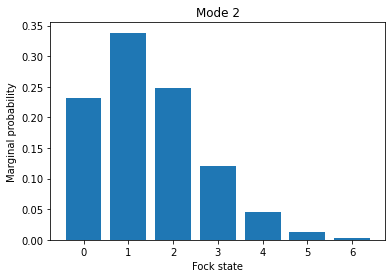

In [28]:
from matplotlib import pyplot as plt
plt.bar(range(7), probs[:7])
plt.xlabel('Fock state')
plt.ylabel('Marginal probability')
plt.title('Mode 2')
plt.show()

In [29]:
fock_probs = state.all_fock_probs()
fock_probs.shape
np.sum(fock_probs, axis=(0,1))

array([2.31507207e-01, 3.38341220e-01, 2.47303007e-01, 1.19982709e-01,
       4.47464693e-02, 1.27354129e-02, 3.60820581e-03, 8.80707478e-04,
       6.61002616e-05, 6.14033830e-06, 2.97354530e-05, 2.88346571e-04,
       6.97411216e-05, 2.31845000e-04, 8.98129559e-05])

In [30]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

prog = sf.Program(3)

alpha = 1+0.5j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    # prepare initial states
    Coherent(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]

    # apply gates
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[1])

    # Perform homodyne measurements
    MeasureX | q[0]
    MeasureP | q[1]

    # Displacement gates conditioned on
    # the measurements
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(sqrt(2) * q[1].par) | q[2]

eng = sf.Engine('fock', backend_options={'cutoff_dim': 15})
result = eng.run(prog, shots=1, modes=None, compile_options={})